In [1]:
from utils import get_datapoint_idx, get_data_splits
from datapipe.shell_dataset import Hdf5Dataset
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

data_path = "/home/sces213/Malaika/lts_modulus/shell_mgn/dataset/dataset.hdf5"
num_training_samples = 50

/home/sces213/Malaika/lts_modulus/lts_venv/lib/python3.10/site-packages/dgl/heterograph_index.py:8: UserWarning: A NumPy version >=1.23.5 and <2.5.0 is required for this version of SciPy (detected version 1.23.0)
  import scipy
/home/sces213/Malaika/lts_modulus/lts_venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
all_idx = get_datapoint_idx(data_path)
train_idx, val_idx, test_idx = get_data_splits(all_idx)
# saving test_idx for future testing
# save_test_idx(test_idx)
# instantiate dataset
train_hdf5 = Hdf5Dataset(data_path, train_idx, len(train_idx))


In [3]:
train_hdf5[0].keys()

dict_keys(['connectivity', 'etypes', 'load', 'ntypes', 'pos', 'spc', 'thickness', 'y'])

In [4]:
disp_x,disp_y,disp_z = [train_hdf5[0]['y'][:,i] for i in range(3)]

In [5]:
import pandas as pd
df_y = pd.DataFrame(train_hdf5[0]['y'])
df_y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4138 entries, 0 to 4137
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       4138 non-null   float32
 1   1       4138 non-null   float32
 2   2       4138 non-null   float32
dtypes: float32(3)
memory usage: 48.6 KB


In [6]:
df_y.describe()

,0,1,2
count,4138.000000,4138.000000,4138.000000
mean,-0.742526,0.194640,-0.141987
std,0.304342,0.193355,0.101762
min,-1.117652,-0.245545,-0.384748
25%,-1.023450,0.103696,-0.197993
50%,-0.804866,0.127079,-0.140269
75%,-0.472509,0.185711,-0.076266
max,0.164556,0.882810,0.107901


/tmp/ipykernel_169384/1205046573.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([disp_x, disp_y, disp_z], labels=['x', 'y', 'z'])


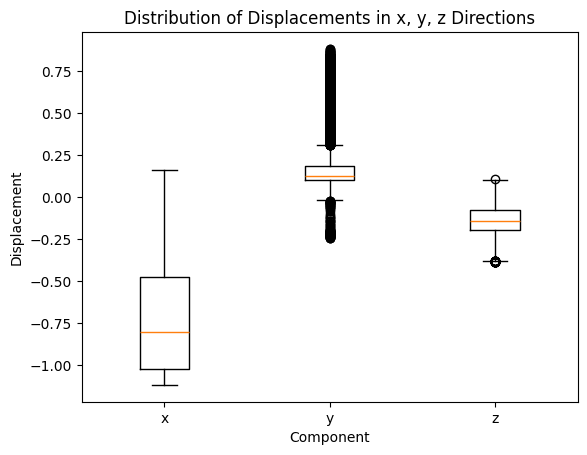

In [7]:
# Import libraries
import matplotlib.pyplot as plt

# Create box plot
plt.boxplot([disp_x, disp_y, disp_z], labels=['x', 'y', 'z'])

# Add labels and title
plt.xlabel('Component')
plt.ylabel('Displacement')
plt.title('Distribution of Displacements in x, y, z Directions')

# Show plot
plt.show()


#### Due to the above high variance in disp_x; y and z losses get stuck, and x keeps improving

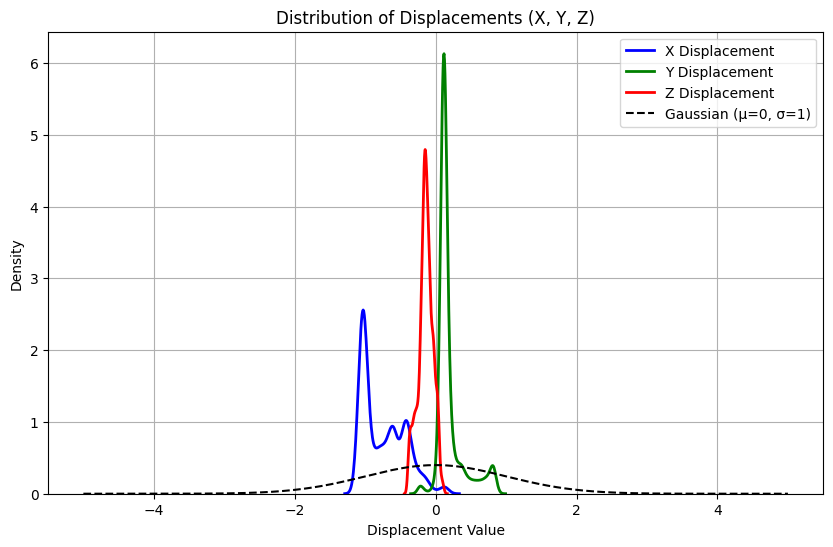

In [8]:


# Create a KDE plot for each distribution
plt.figure(figsize=(10, 6))

sns.kdeplot(disp_x, label='X Displacement', color='blue', linewidth=2)
sns.kdeplot(disp_y, label='Y Displacement', color='green', linewidth=2)
sns.kdeplot(disp_z, label='Z Displacement', color='red', linewidth=2)

# Add a Gaussian distribution for comparison (optional)
x_vals = np.linspace(-5, 5, 1000)
plt.plot(x_vals, stats.norm.pdf(x_vals, 0, 1), '--', label='Gaussian (μ=0, σ=1)', color='black')

# Customize the plot
plt.title('Distribution of Displacements (X, Y, Z)')
plt.xlabel('Displacement Value')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

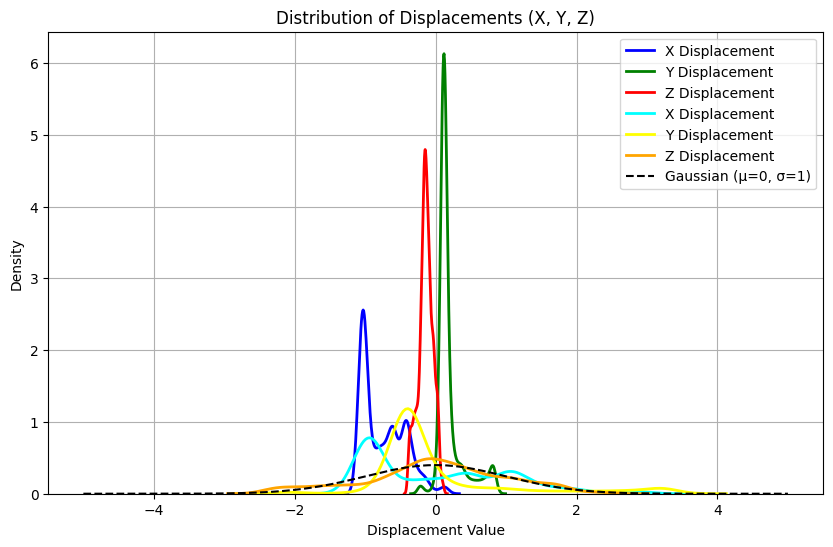

In [9]:
norm_x = stats.zscore(disp_x)
norm_y = stats.zscore(disp_y)
norm_z = stats.zscore(disp_z)


# Create a KDE plot for each distribution
plt.figure(figsize=(10, 6))

sns.kdeplot(disp_x, label='X Displacement', color='blue', linewidth=2)
sns.kdeplot(disp_y, label='Y Displacement', color='green', linewidth=2)
sns.kdeplot(disp_z, label='Z Displacement', color='red', linewidth=2)
sns.kdeplot(norm_x, label='X Displacement', color='cyan', linewidth=2)
sns.kdeplot(norm_y, label='Y Displacement', color='yellow', linewidth=2)
sns.kdeplot(norm_z, label='Z Displacement', color='orange', linewidth=2)

# Add a Gaussian distribution for comparison (optional)
x_vals = np.linspace(-5, 5, 1000)
plt.plot(x_vals, stats.norm.pdf(x_vals, 0, 1), '--', label='Gaussian (μ=0, σ=1)', color='black')

# Customize the plot
plt.title('Distribution of Displacements (X, Y, Z)')
plt.xlabel('Displacement Value')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()